In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open    Volume
Ticker           GOOG       GOOG       GOOG       GOOG       GOOG      GOOG
Date                                                                       
2019-01-02  52.105282  52.292500  52.616001  50.785500  50.828499  30652000
2019-01-03  50.621113  50.803001  52.848999  50.703499  52.049999  36822000
2019-01-04  53.343830  53.535500  53.542000  51.370899  51.629501  41878000
2019-01-07  53.228245  53.419498  53.700001  52.737999  53.575001  39638000
2019-01-08  53.621330  53.813999  54.228001  53.026501  53.805500  35298000
Price        Adj Close       Close        High         Low        Open  \
Ticker            GOOG        GOOG        GOOG        GOOG        GOOG   
Date                                                                     
2024-12-09  177.100006  177.100006  178.039993  175.399994  175.714996   
2024-12-10  186.529999  186.529999  188.029999  182.669998  184.535004   
2024-12-11  196.710007


c:\Github\Deep-Learning\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0361 - val_loss: 0.0016
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.7070e-04 - val_loss: 8.4690e-04
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.6623e-04 - val_loss: 5.6181e-04
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.6405e-04 - val_loss: 5.3867e-04
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.3675e-04 - val_loss: 5.0106e-04
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.7628e-04 - val_loss: 5.1345e-04
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.7966e-04 - val_loss: 7.5017e-04
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.4378e-04 - val_loss: 4.9999e-04
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.8869e-04 - val_loss: 4.1658e-04
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.6429e-04 - val_loss: 4.0497e-04
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.6968e-04 - val_loss: 4.365

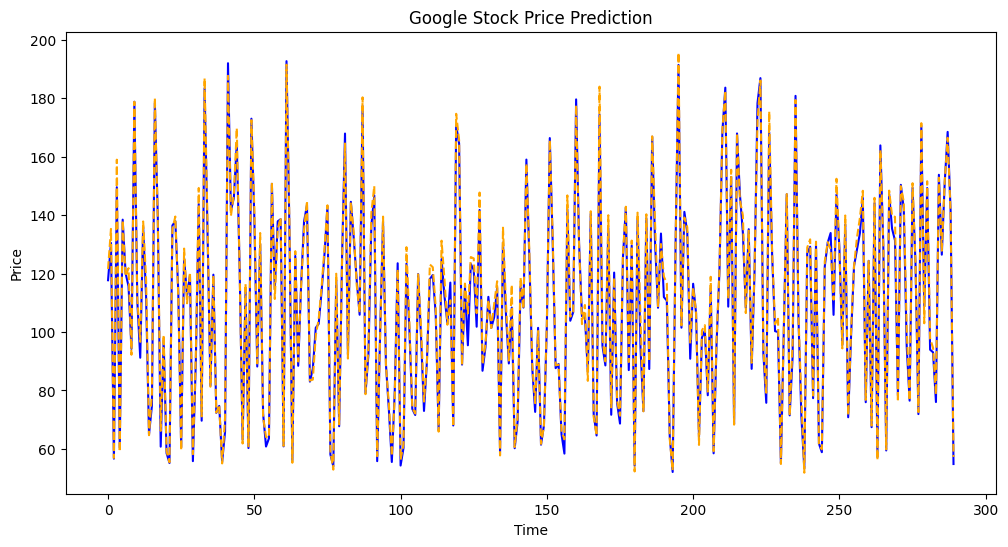

In [9]:
# Step 1: Download Google stock price data using yfiance
symbol = "GOOG" #Google stock ticker
data = yf.download(symbol, start="2019-01-01", end="2024-12-16")
print(data.head())
print (data.tail())

# use the 'Close' prces for forcasting:
prices = data['Close'].values

#Step2: Normalise the data (MinMaxScalre for scaling between 0 - 1)
scaler = MinMaxScaler(feature_range =(0, 1))
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

def create_sequences(data, n_steps):
 """
 Creates sequences of n_steps length using NumPy's slicing.
 """
 data = np.array(data) # Ensure data is a NumPy array
 num_samples = len(data) - n_steps
 x = np.array([data[i:i + n_steps] for i in range(num_samples)])
 y = data[n_steps:]
 return x, y

n_steps = 50 # Number of time steps in each input sequence
x , y = create_sequences(prices_scaled, n_steps)

# Step 4: Split data into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

#Step 5: Build the RNN model
model = Sequential([
 SimpleRNN(50, activation = 'tanh', input_shape = (n_steps, 1)),
 Dense(1) # Output layer for regression (Single values)
])

# Compile the model
model.compile(optimizer = 'adam', loss = 'mse')

# Step 6: Train the model
history = model.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.2)

# Step 7: Evaluate the model
loss = model.evaluate(x_test, y_test)
print("Test loss: {loss:.4f}")

#Step 8: Make predictions and inverse  transform the scaling
y_pred = model.predict(x_test)
y_pred_orignal = scaler.inverse_transform(y_pred)
y_test_orignal = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12,6))
plt.plot(y_test_orignal, label='True Prices', color='blue')
plt.plot(y_pred_orignal, label='Predicted Prices', color='orange', linestyle='dashed')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel("Price")
plt.show()